Plasma Etching Example

In [1]:
import numpy as np
from scipy import stats

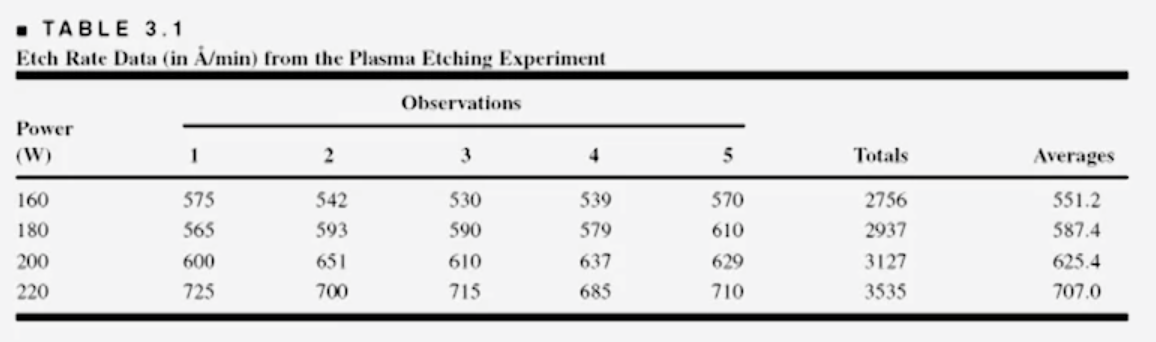

In [2]:
data = np.array([[575,542,530,539,570],
        [565,593,590,579,610],
        [600,651,610,637,629],
        [725,700,715,685,710]])

In [5]:
np.sum(data, axis=1)

array([2756, 2937, 3127, 3535])

In [4]:
np.mean(data, axis=1)

array([551.2, 587.4, 625.4, 707. ])

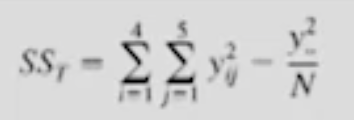

In [45]:
SS_total = (data**2).sum() - (data.sum()**2)/data.size
SS_total

72209.75

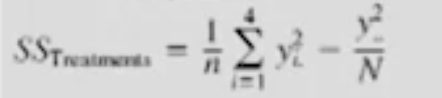

In [44]:
SS_treatments = (data.sum(axis=1)**2).sum()/5 - (data.sum()**2)/data.size
SS_treatments

66870.54999999981

In [46]:
SS_error = SS_total - SS_treatments
SS_error

5339.200000000186

In [49]:
# df = degrees of freedom
df_total = data.size - 1
df_treatment = data.shape[0] - 1
df_error = df_total - df_treatment
df_error

16

In [50]:
MS_treatment = SS_treatments/df_treatment
MS_treatment

22290.183333333272

In [51]:
MS_error = SS_error/df_error
MS_error

333.70000000001164

In [52]:
F = MS_treatment/MS_error
F

66.79707321945608

In [55]:
f_dist = stats.f(3,16)
1 - f_dist.cdf(F)

2.882865945963431e-09

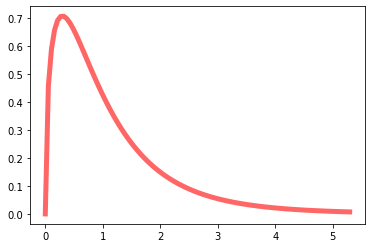

In [62]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)
x = np.linspace(f_dist.ppf(0), f_dist.ppf(0.99), 100)
ax.plot(x, f_dist.pdf(x),'r-', lw=5, alpha=0.6, label='f pdf')

In [8]:
from scipy.stats import f_oneway
f_oneway(data[0,:], data[1,:], data[2,:], data[3,:])

F_onewayResult(statistic=66.79707321945864, pvalue=2.882865908493268e-09)

# LSD Test

In [70]:
labels = [160]*5 + [180]*5 + [200]*5 + [220]*5
values = np.hstack(data)

In [74]:
import pandas as pd
df = pd.DataFrame([labels,values]).T
df.columns = ['labels','values']
df

,labels,values
0,160,575
1,160,542
2,160,530
3,160,539
4,160,570
5,180,565
6,180,593
7,180,590
8,180,579
9,180,610


In [80]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

mc = MultiComparison(df['values'], df['labels'])
mc_results = mc.tukeyhsd()
print(mc_results)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
   160    180     36.2 0.0294   3.143  69.257   True
   160    200     74.2  0.001  41.143 107.257   True
   160    220    155.8  0.001 122.743 188.857   True
   180    200     38.0 0.0216   4.943  71.057   True
   180    220    119.6  0.001  86.543 152.657   True
   200    220     81.6  0.001  48.543 114.657   True
----------------------------------------------------
